In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('/home/rgukt/Downloads/spam.csv', encoding='latin1')

In [3]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1668,ham,"Yes..but they said its IT.,",NaN,NaN,NaN
3777,ham,Once a fishrman woke early in d mrng. It was v...,NaN,NaN,NaN
25,ham,Just forced myself to eat a slice. I'm really ...,NaN,NaN,NaN
1474,ham,"Friendship is not a game to play, It is not a ...",NaN,NaN,NaN
2257,ham,Here got lots of hair dresser fr china.,NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

## DATA CLEANING

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
data.sample(5)

,v1,v2
2474,ham,"Princess, i like to make love &lt;#&gt; time..."
2248,ham,will you like to be spoiled? :)
4476,ham,Oh :-)only 4 outside players allowed to play know
2012,ham,Beautiful Truth against Gravity.. Read careful...
5005,ham,ILL B DOWN SOON


In [7]:
data.rename(columns={'v1':'target', 'v2':'text'},inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
data['target']=encoder.fit_transform(data['target'])

In [10]:
data.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#check for duplicates
data.duplicated().sum()

403

In [13]:
#remove duplicates
data=data.drop_duplicates(keep='first')

In [14]:
data.duplicated().sum()

0

In [15]:
data.shape

(5169, 2)

## DATA ANALYSIS

In [16]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

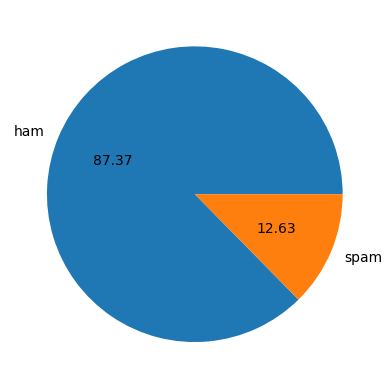

In [18]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/rgukt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
data['num_characters']=  data['text'].apply(len)

In [22]:
data.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
#no of words
data['num_words']= data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
#no of sentecnes
data['num_sentences']= data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
 data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#ham
data[data['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#spam
data[data['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='num_characters', ylabel='Count'>

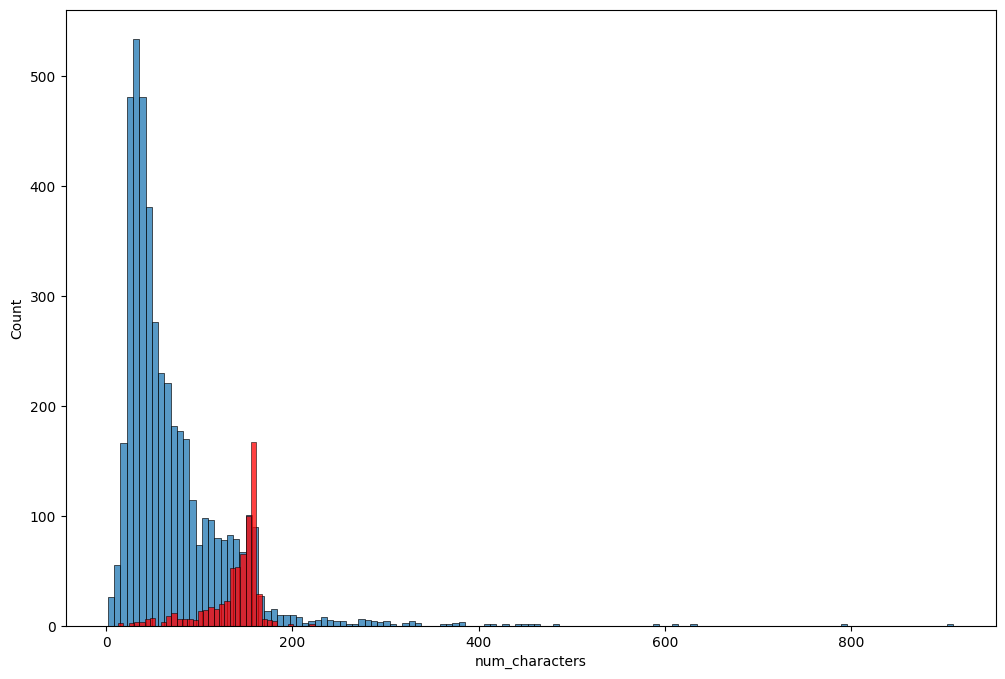

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['target']==0]['num_characters'])
sns.histplot(data[data['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

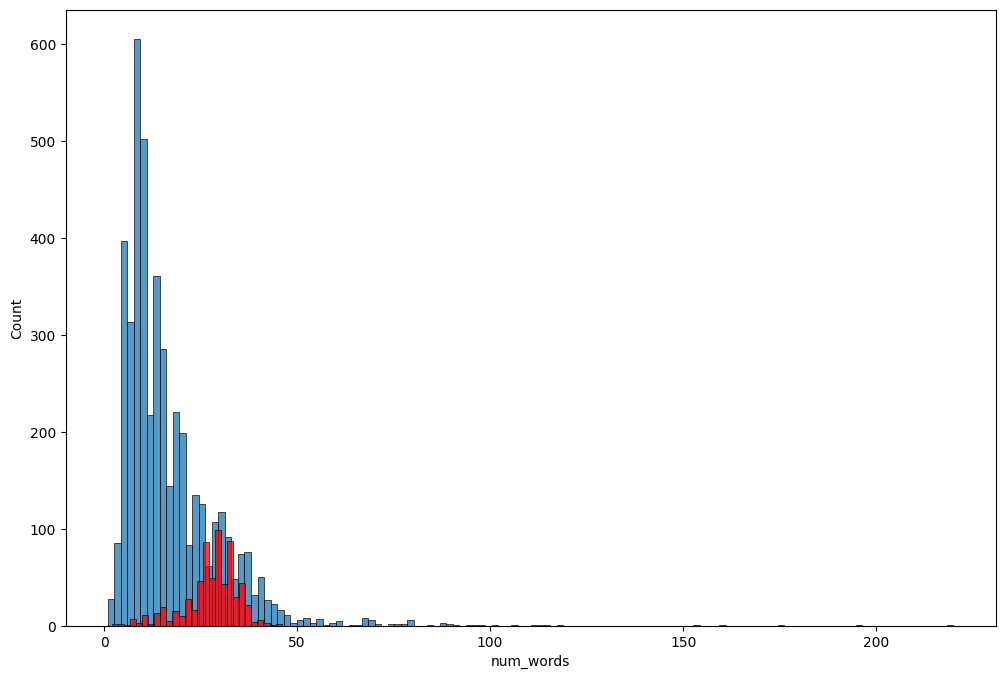

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['target']==0]['num_words'])
sns.histplot(data[data['target']==1]['num_words'],color='red')

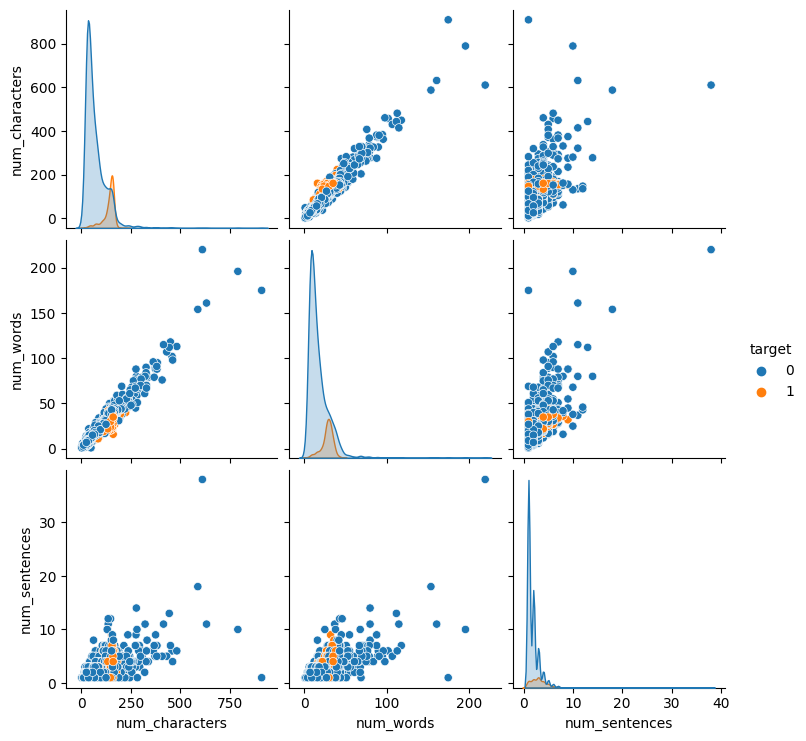

In [32]:
sns.pairplot(data,hue='target')

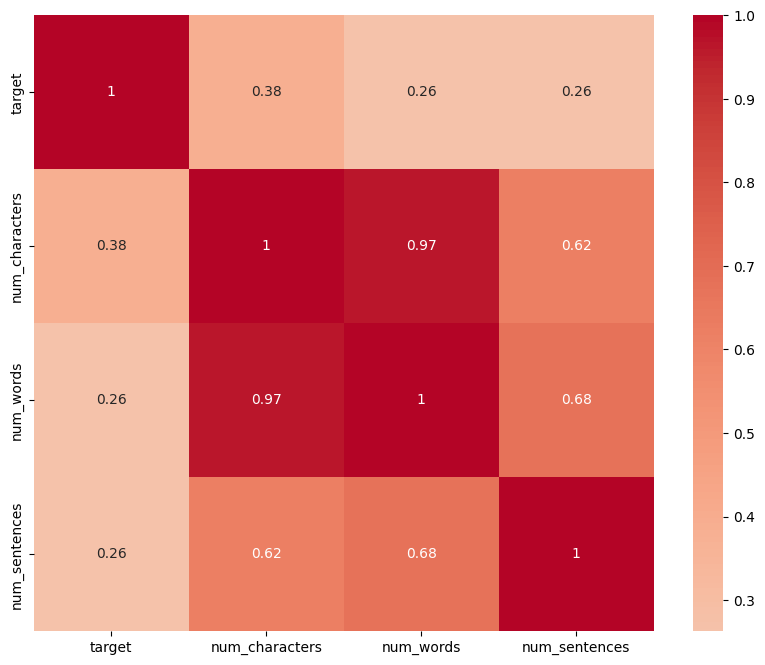

In [33]:
numeric_data = data.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

## DATA PREPROCESSING

In [65]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [66]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

NameError: name 'ps' is not defined

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
transform_text('hi! how are you')

['hi']

In [38]:
data['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [39]:
data['transformred_text']=data['text'].apply(transform_text)

In [40]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformred_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goes, usf, lives, around, though]"


In [41]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [42]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformred_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goes, usf, lives, around, though]"


## MODEL BUILDING

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer
cv = CountVectorizer()


In [60]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = word_tokenize(text)
    
    # Remove non-alphanumeric tokens
    y = [i for i in text if i.isalnum()]
    
    # Remove stopwords and punctuation
    y = [i for i in y if i not in stopwords.words('english') and i not in string.punctuation]
    
    # Stem the tokens
    stemmer = PorterStemmer()
    y = [stemmer.stem(word) for word in y]
    
    return " ".join(y)  # Join the tokens back into a single string

# Example DataFrame
#data = pd.DataFrame({
 #   'text': [
  ##     "Ok lar... Joking wif u oni...",
    #    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
    #],
    #'target': [1, 0, 1]
#})

# Apply the transform_text function to the text data
data['transformed_text'] = data['text'].apply(transform_text)

# Use CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data['transformed_text']).toarray()

print(X)


[[0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0
  0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1
  0 0 0]
 [1 1 1 0 1 0 0 0 0 1 0 1 2 2 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0
  1 1 0]]


[nltk_data] Downloading package punkt to /home/rgukt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/rgukt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
X.shape

(3, 39)

In [62]:

y=data['target'].values
y

array([1, 0, 1])